回归模型
----SVM----
              precision    recall  f1-score   support

          -1       0.92      0.90      0.91     25312
           1       0.91      0.92      0.91     25821

    accuracy                           0.91     51133
   macro avg       0.91      0.91      0.91     51133
weighted avg       0.91      0.91      0.91     51133

0 0
   TN    FP    FN     TP   precision  accuracy  recall   F1   roc  
 22858  2108  2454  23713     0.91      0.91     0.92   0.91  0.91 


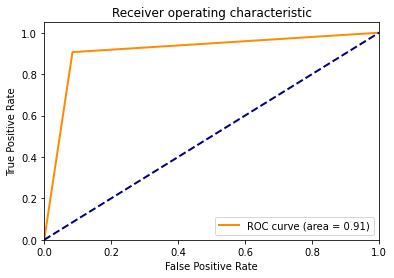

贝叶斯分类器
              precision    recall  f1-score   support

          -1       0.86      0.90      0.88     23946
           1       0.91      0.88      0.89     27187

    accuracy                           0.89     51133
   macro avg       0.89      0.89      0.89     51133
weighted avg       0.89      0.89      0.89     51133

0 0
   TN    FP    FN     TP   precision  accuracy  recall   F1   roc  
 21572  3394  2374  23793     0.91      0.89     0.88   0.89  0.89 


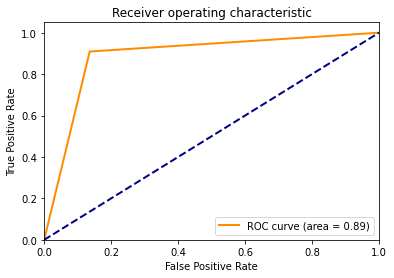

逻辑回归
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   20.4s finished
/Users/zhipeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

          -1       0.98      0.98      0.98     25109
           1       0.98      0.98      0.98     26024

    accuracy                           0.98     51133
   macro avg       0.98      0.98      0.98     51133
weighted avg       0.98      0.98      0.98     51133

0 0
   TN    FP   FN    TP   precision  accuracy  recall   F1   roc  
 24511  455  598  25569     0.98      0.98     0.98   0.98  0.98 


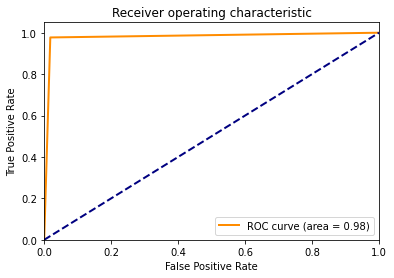

Best parameter set: {'clf__C': 10.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1)} 
CV Accuracy: 0.929
Test Accuracy: 0.928
              precision    recall  f1-score   support

        -1.0       0.84      0.84      0.84      6093
        -0.0       0.00      0.00      0.00       157
         1.0       0.85      0.86      0.85      6534

    accuracy                           0.84     12784
   macro avg       0.56      0.57      0.56     12784
weighted avg       0.83      0.84      0.84     12784

0 0


/Users/zhipeng/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [4]:
import numpy as np
import pandas as pd
import jieba
from sklearn.model_selection import train_test_split           #划分训练/测试集
from sklearn.feature_extraction.text import CountVectorizer    #抽取特征
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



data_path = '../data/'

#读取并清洗数据
#因为几个文档的编码不大一样，所以兼容了三种编码模式，根据经验，这三种是经常会遇到的
def get_txt_data(txt_file):
    mostwords=[]
    try:
        file=open(txt_file,'r',encoding='utf-8')
        for line in file.readlines():
            curline=line.strip().split("\t")
            mostwords.append(curline)
    except:
        try:
            file=open(txt_file,'r',encoding='gb2312')
            for line in file.readlines():
                curline=line.strip().split("\t")
                mostwords.append(curline)
        except:
            try:
                file=open(txt_file,'r',encoding='gbk')
                for line in file.readlines():
                    curline=line.strip().split("\t")
                    mostwords.append(curline)
            except:
                ''   
    return mostwords

neg_doc=get_txt_data(r''+ data_path +'neg.txt')
pos_doc=get_txt_data(r''+ data_path +'pos.txt')

def context_cut(sentence):
    words_list=[]
    #获取停用词
    stop=open(r''+ data_path + 'stopwords.txt','r+',encoding='utf-8')
    stopwords=stop.read().split('\t')
    cut_words=list(jieba.cut(sentence))
    words_str=""
    for word in cut_words:
        if not(word in stopwords):
            words_list.append(word)
        words_str=','.join(words_list)
    return words_str,words_list 

#合并两个数据集，并且打上标签，分成测试集和训练集
words=[]
word_list=[]
for i in neg_doc:
    cut_words_str,cut_words_list=context_cut(i[0])
    word_list.append((cut_words_str,-1))
    words.append(cut_words_list)
for j in pos_doc:
    cut_words_str2,cut_words_list2=context_cut(j[0])
    word_list.append((cut_words_str2,1))
    words.append(cut_words_list2)
#word_list=[('菜品,质量,好,味道,好,就是,百度,的,问题,总是,用,运力,原因,来,解释,我,也,不,懂,这,是,什么,原因,晚,了,三个,小时,呵呵,厉害,吧,反正,订,了,就,退,不了,只能,干,等', -1),...,...]
#将word_list中的值和标签分别赋予给x,y
x,y=zip(*word_list)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

def print_data():
    print("x_train")
    print(x_train)
    print("x_test")
    print(x_test)
    print("y_train")
    print(y_train)
    print("y_test")
    print(y_test)
#print_data()

def get_df(x_train):
    vec = CountVectorizer(max_features=500) #该类会将文本中的词语转换为词频矩阵，矩阵元素a[i][j] 表示j词在i类文本下的词频
    tfidf = TfidfTransformer(use_idf = True, norm = 'l2', smooth_idf = True) #该类会统计每个词语的tf-idf权值
    tfidf_x_train=tfidf.fit_transform(vec.fit_transform(x_train)) #将文本转为词频矩阵并计算tf-idf
    np.set_printoptions(precision = 2)
    x_train_weight = tfidf_x_train.toarray()
    return x_train_weight

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
        
    T2 = 0
    T0 = 0
    Tn2 = 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==-1:
           TN += 1
        if y_hat[i]==-1 and y_actual[i]!=y_hat[i]:
           FN += 1
        if y_hat[i] == -2:
            Tn2 += 1
        if y_hat[i] == 2:
            T2 += 1
    print(T2, Tn2)
    #tn, fp, fn, tp
    import prettytable as pt

    # tb = pt.PrettyTable( ["City name", "Area", "Population", "Annual Rainfall"])
    tb = pt.PrettyTable()
    y_train_hat = y_hat
    y_train = y_actual
    ac=pre=recall=f1=roc=0
    ac = round(accuracy_score(y_train_hat,y_train),2)
    recall = round(recall_score(y_train_hat,y_train),2)
    f1 = round(f1_score(y_train_hat,y_train),2)
    roc = round(roc_auc_score(y_train_hat,y_train),2)
    pre = round(precision_score(y_train_hat, y_train),2)
    tb.field_names = ["TN", "FP", "FN", "TP", "precision", "accuracy", "recall", "F1", "roc"]
    tb.add_row([TN,FP, FN, TP,pre, ac, recall, f1, roc])
    tb.border=False
    print(tb)
    
    
    return(TN, FP, FN, TP)
    #return(TP, FP, TN, FN)

# 分类报告：precision/recall/fi-score/均值/分类个数
def report(y_train, y_train_hat):
    from sklearn.metrics import classification_report
    y_train_hat=[round(x) for x in y_train_hat]
    #tn, fp, fn, tp = confusion_matrix(y_train, y_train_hat).ravel()
    #target_names = ['-1','1']
    print(classification_report(y_train_hat,y_train))
    
    #print(tn, fp, fn, tp)  # 1 1 1 1
    perf_measure(y_train,y_train_hat)
    # Compute ROC curve and ROC area for each class
    y_test=y_train
    y_score=y_train_hat
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test, y_score)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
    plt.plot([-1, 1], [-1, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

vec=TfidfVectorizer(analyzer='word', ngram_range=(1,4), max_features=500)



####
print("回归模型")
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()

lin_reg.fit(vec.fit_transform(x_train),y_train)


y_test_hat=lin_reg.predict(vec.fit_transform(x_test))
y_train_hat=lin_reg.predict(vec.fit_transform(x_train))
lin_mse1=mean_squared_error(y_test,y_test_hat)
lin_mse2=mean_squared_error(y_train,y_train_hat)

lin_rmse1=np.sqrt(lin_mse1)
lin_rmse2=np.sqrt(lin_mse2)
#report(y_test, y_test_hat)




##----------4.使用SVM模型进行训练----##
from sklearn import svm 
print("----SVM----")
#使用TF-IDF提取特征，使用SVM训练，结果为0.83125
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

classfier = svm.SVC(kernel='linear')
classfier.fit(vec.fit_transform(x_train),y_train)
#print(classfier.score(vec.fit_transform(x_test),y_test))

#print ('训练集:',classfier.score(vec.fit_transform(x_train), y_train))  # 精度
#print ('测试集:',classfier.score(vec.fit_transform(x_test), y_test))
'''训练集: 0.85234375
测试集: 0.83125'''
y_train_hat=classfier.predict(vec.fit_transform(x_train))
#print ('训练集准确率：',accuracy_score(y_train_hat,y_train))
#print ('训练集召回率：',recall_score(y_train_hat,y_train))
#print ('F1:',f1_score(y_train_hat,y_train))
#print ('ROC值：',roc_auc_score(y_train_hat,y_train))
'''训练集准确率： 0.85234375
训练集召回率： 0.8585552543453995
F1: 0.8506873123716229
ROC值： 0.852466476919981'''
report(y_train, y_train_hat)

###------------
print("贝叶斯分类器")
classfier = MultinomialNB()
classfier.fit(vec.fit_transform(x_train),y_train)
y_train_hat=classfier.predict(vec.fit_transform(x_train))
report(y_train, y_train_hat)
#print('训练集:',classfier.score(vec.transform(x_test),y_test))
#print('测试集:',classfier.score(vec.transform(x_train),y_train))


###----
print("逻辑回归")
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
 
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)
 
param_grid = [{'vect__ngram_range': [(1, 1)],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]
 
lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0))])
 
gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

gs_lr_tfidf.fit(x_train, y_train)
y_train_hat=gs_lr_tfidf.predict(x_train)
report(y_train, y_train_hat)
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(x_test, y_test))


### 决策树
##----------2.决策树-----##
#模型效果不好的时候（拟合不足），考虑换个更强大的模型，决策树
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()

tree_reg.fit(vec.transform(x_train),y_train)

y_test_hat=tree_reg.predict(vec.transform(x_test))
y_train_hat=tree_reg.predict(vec.transform(x_train))
tree_mse1=mean_squared_error(y_test,y_test_hat)
tree_mse2=mean_squared_error(y_train,y_train_hat)
tree_rmse1=np.sqrt(tree_mse1)
tree_rmse2=np.sqrt(tree_mse2)
report(y_test, y_test_hat)